**Homework 3**

This assignment is a continuation of homework 2. Make sure you complete that first!.

We begin with the usual imports.

In [309]:
import numpy as np
import pandas as pd

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Now load the iris dataset.

In [310]:
iris = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv",index_col=0)

In the code block below copy your code from homework 2 that defines the function `KNN`, together with all of the helper functions.

In [311]:
def sq_distances(data, length, width):
  return pd.Series(np.linalg.norm(data - (length, width), axis=1))

def SpeciesOfNeighbors(data, target, x, y, k):
  distances = sq_distances(data, x, y)
  distances_species_df = pd.concat([target, distances], axis=1, keys=['Species', 'Distance']).sort_values('Distance')

  return distances_species_df['Species'][:k]

def prediction(labels):
  return labels.value_counts().idxmax()

def KNN(data, target, x, y, k):
  nearest_labels = SpeciesOfNeighbors(data, target, x, y, k)
  return prediction(nearest_labels)

The iris dataset contains 150 observations. We'd like to set aside 20% of these for testing the accuracy of our model(s). In the code block below, we create a Numpy array `test_indices` with a random sample of 20% of the numbers from 0 to 149. Then, we create a boolean Numpy array with a value of True for each index listed in `test_indices`, and False for the other values. Finally, we create a boolean Numpy array `train_mask` with the negation of each entry in `test_mask`. Spend some time examining the commands in the code block to make sure you understand them.

In [312]:
np.random.seed(6) #controls randomness. Do not change!
size=len(iris)  #size of original dataset (should be 150 for iris)
test_frac=0.2 #fraction of dataset to set aside for testing
test_size=int(size*test_frac) #desired size of test dataset
test_indices=np.random.choice(np.arange(size),test_size) #random sample of indices from iris
test_mask=np.zeros(size,dtype=bool) #numpy array of False values
test_mask[test_indices]=True #change values at desired indices to True
train_mask=~test_mask #True->False, False->True

Define `test_data` to be a DataFrame containing the `Petal.Length` and `Petal.Width` of the rows specified by `test_mask`. Define `test_target` to be a Pandas Series containing the `Species` of those rows. Define `train_data` and `train_target` similarly.

In [313]:
iris['train_mask'] = train_mask
iris['test_mask'] = test_mask

In [314]:
train_data = iris[(iris["train_mask"] == True)][["Petal.Length", "Petal.Width"]].reset_index(drop=True)

In [315]:
train_target = iris[(iris["train_mask"] == True)]["Species"].reset_index(drop=True)

In [316]:
test_data = iris[(iris["test_mask"] == True)][["Petal.Length", "Petal.Width"]].reset_index(drop=True)

In [317]:
test_target = iris[(iris["test_mask"] == True)]["Species"].reset_index(drop=True)

Define a function called `predict_labels` whose inputs are `train_data`, `train_target`, `test_data` and `k`. Your function should output a Series of labels (one for each entry in `test_data`) that are predicted by your KNN function, based on the k-closest points in train_data.

*Hints.* There are many ways to do this. Here are two possibilities:
1. Use the Pandas command `apply` and a lambda function. (strongly preferred)
2. Use a "for loop", collect your answers in a list, and then convert to a Pandas Series object.

In [318]:
def predict_labels(train_data,train_target,test_data,k):
  answers = []
  n_row = test_data.shape[0]
  
  for ri in range(n_row):
    x, y = test_data.iloc[ri, 0], test_data.iloc[ri, 1]
    label = KNN(train_data, train_target, x, y, k)
    answers.append(label)
    
  return answers

Define a function called `accuracy` whose inputs are `train_data`, `train_target`, `test_data`, `test_target` and `k`. Your function should return the accuracy: the fraction of times your `predict_labels` function returned the correct answer.

In [319]:
def accuracy(train_data,train_target,test_data,test_target,k):
  predictedLabels = predict_labels(train_data,train_target,test_data,k)
  answer = 0
  for i, label in enumerate(predictedLabels):
    answer += (label == test_target[i])
  return answer / len(predictedLabels)

Our goal is to visualize the accuracy of our KNN algorithm for various values of k, so we may pick the best one. Reasonable values of k start at 3, and may go as high as 20 (depending on the application). For each such value of k, compute the accuracy and assemble these in a 1D Numpy array.

In [320]:
k_values=np.arange(3,20) #possible values for k
accuracies = []
for k in k_values:
    accuracy_rate = accuracy(train_data,train_target,test_data,test_target,k)
    accuracies.append(accuracy_rate)

Run the following code block to visualize:

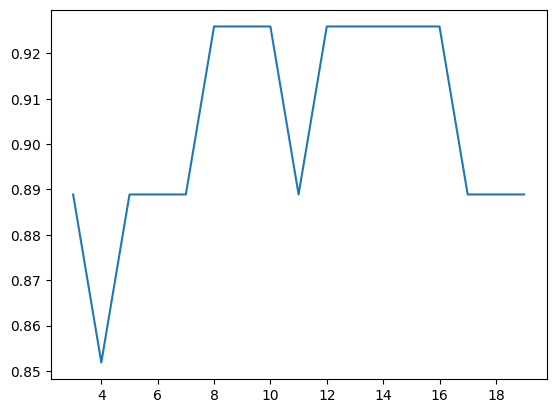

In [321]:
import matplotlib.pyplot as plt
plt.plot(k_values,accuracies)

The optimal value of k will be the first odd number appearing at a maximum (think about why). What is it?

In [322]:
# Reset label to 0 but k starts at 1
k = k_values[np.argmax(accuracies) + 1]